In [1]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from LowLevelModules.Spectroscopy import Spectrum
from scipy.optimize import curve_fit
from LowLevelModules.GeneralFunctions import get_work_dir, prettify_plot, prettify_2d_plot, voigt_func, voigt_func_2p
import numpy as np
import os
# user input
wdir = r'Z:\Projects\WSe2\2019\12 december\2019-12-06 hBN WSe2 300nm pillars Tom cooldown\spectra'
f = 'Pillar8_500nW_5K_timetrace 01'

file = wdir + '\\' + f + '.spe'
spect = Spectrum(file)
t_exp = spect.exposure_time
num_file = len(spect.data)
t_trace = np.zeros((num_file, 1340))
_time = np.arange(num_file) * t_exp

for i in range(num_file):
    single_shot = spect.data[i][0].T
    single_shot = single_shot[:,0] / t_exp
    t_trace[i,:] = single_shot

(700, 820)

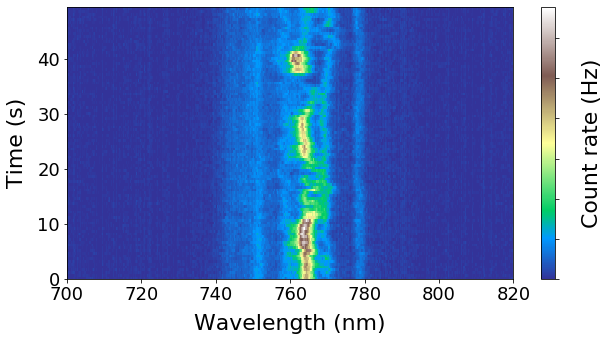

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
p2 = ax.pcolor(spect.x, _time, t_trace, cmap='terrain', vmin=0, vmax=np.max(t_trace)) #norm=LogNorm(vmin=0, vmax=np.max(z))) #
cb2 = fig.colorbar(p2)
prettify_2d_plot(ax, cb2, 'Wavelength (nm)', 'Time (s)', 'Count rate (Hz)')
plt.xlim(700, 820)

In [27]:
fig.savefig(wdir + '\\' + f + '.png', format='png', bbox_inches='tight')

(-20, 431.3)

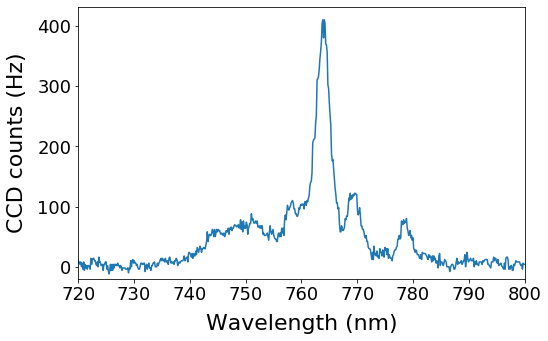

In [4]:
single_shot_num = 50
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 5))
ax2.plot(spect.x, t_trace[single_shot_num,:], '-', label='single shot')
#ax2.plot(spect.x, np.mean(t_trace, axis=0), '-', label='averaged')
prettify_plot(ax2, "Wavelength (nm)", "CCD counts (Hz)")
ax2.set_xlim(720, 800)
ax2.set_ylim(bottom=-20)
#ax2.legend(fontsize=16, frameon=False)

In [18]:
fig2.savefig(wdir + '\\' + f + '_singleVSaverage.png', format='png', bbox_inches='tight')